In [3]:
from collections import Counter
import spacy
import textacy
from spacy import displacy
import pandas as pd
import numpy as np
from wordfreq import word_frequency
from wordfreq import zipf_frequency
import matplotlib.pyplot as plt
import random
import os
nlp = spacy.load('en_core_web_sm')

In [5]:
cwd = os.getcwd()
train_data = open(f'{cwd}/data/preprocessed/train/sentences.txt', encoding='utf-8')
text = train_data.read()
train_data_doc = nlp(text)

<h1><b>PART A</b></h1>

<b>TASK 1</b>

In [6]:
word_frequencies = Counter()
words_per_sentence = []

for sentence in train_data_doc.sents:
    words = []
    words_single_sentence = 0
    for token in sentence:
        # Let's filter out punctuation and new lines ("/n")
        if (not token.is_punct) and (not token.is_space):
            words.append(token.text)
            words_single_sentence += 1
    words_per_sentence.append(words_single_sentence)
    word_frequencies.update(words)

#print(word_frequencies)
num_tokens = len(train_data_doc)
num_words = sum(word_frequencies.values())
num_types = len(word_frequencies.keys())
avg_num_words_per_sentence = sum(words_per_sentence) / len(words_per_sentence)
avg_word_length = sum(len(word) for word in words) / len(words)

print('Number of Tokens: ' + str(num_tokens))
print('Number of Words: ' + str(num_words))
print('Number of Types: ' + str(num_types))

print('Average number of words per sentence: {number:.{digits}f}'.format(number = avg_num_words_per_sentence, digits = 2))
print('Average word length: {number:.{digits}f}'.format(number = avg_word_length, digits = 2))

Number of Tokens: 16130
Number of Words: 13242
Number of Types: 3721
Average number of words per sentence: 18.44
Average word length: 3.57


<b>TASK 2</b>

In [67]:
pos_list = []

NN_Noun = []
NNP_Propn = []
IN_Adp = []
DT_Det = []
JJ_Adj = []
NNS_Noun = []
COMMA_Punct = []
PERIOD_Punct = []
SP_Space = []
VBN_Verb = []

for token in train_data_doc:
    #print(token.pos_, token.tag_)
    pos_list.append('{}, {}'.format(token.pos_, token.tag_))
    if ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NN'):
        NN_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PROPN, NNP'):
        NNP_Propn.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADP, IN'):
        IN_Adp.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'DET, DT'):
        DT_Det.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADJ, JJ'):
        JJ_Adj.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NNS'):
        NNS_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, ,'):
        COMMA_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, .'):
        PERIOD_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'SPACE, _SP'):
        SP_Space.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'VERB, VBN'):
        VBN_Verb.append(token.text)


pos_frequencies = Counter(pos_list)
rtf = []
rtf.append(round(pos_frequencies['NOUN, NN']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PROPN, NNP']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['ADP, IN']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['DET, DT']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['ADJ, JJ']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['NOUN, NNS']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PUNCT, ,']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PUNCT, .']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['SPACE, _SP']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['VERB, VBN']/sum(pos_frequencies.values()), 2))

finegrained = ["NOUN", "PROPN", "ADP", "DET", "ADJ", "NOUN", "PUNCT", "PUNCT", "SPACE", "VERB"]
universal = ["NN", "NNP", "IN", "DT", "JJ", "NNS", ",", ".", "_SP", "VBN"]
occurrences = [len(NN_Noun), len(NNP_Propn), len(IN_Adp), len(DT_Det), len(JJ_Adj), len(NNS_Noun), len(COMMA_Punct), len(PERIOD_Punct), len(SP_Space), len(VBN_Verb)]

most_frequent = []
most_frequent.append(Counter(NN_Noun).most_common(3))
most_frequent.append(Counter(NNP_Propn).most_common(3))
most_frequent.append(Counter(IN_Adp).most_common(3))
most_frequent.append(Counter(DT_Det).most_common(3))
most_frequent.append(Counter(JJ_Adj).most_common(3))
most_frequent.append(Counter(NNS_Noun).most_common(3))
most_frequent.append(Counter(COMMA_Punct).most_common(3))
most_frequent.append(Counter(PERIOD_Punct).most_common(3))
most_frequent.append(Counter(SP_Space).most_common(3))
most_frequent.append(Counter(VBN_Verb).most_common(3))

least_frequent = []
least_frequent.append(Counter(NN_Noun).most_common()[-1])
least_frequent.append(Counter(NNP_Propn).most_common()[-1])
least_frequent.append(Counter(IN_Adp).most_common()[-1])
least_frequent.append(Counter(DT_Det).most_common()[-1])
least_frequent.append(Counter(JJ_Adj).most_common()[-1])
least_frequent.append(Counter(NNS_Noun).most_common()[-1])
least_frequent.append(Counter(COMMA_Punct).most_common()[-1])
least_frequent.append(Counter(PERIOD_Punct).most_common()[-1])
least_frequent.append(Counter(SP_Space).most_common()[-1])
least_frequent.append(Counter(VBN_Verb).most_common()[-1])

word_class_table = pd.DataFrame({"Finegrained POS-tag":finegrained, "Universal POS-tag":universal, "Occurrences": occurrences, "Relative Tag Frequency (%)" : rtf, "3 most frequent tokens" : most_frequent, "Example of infrequent token": least_frequent})
word_class_table.head(10)

,Finegrained POS-tag,Universal POS-tag,Occurrences,Relative Tag Frequency (%),3 most frequent tokens,Example of infrequent token
0,NOUN,NN,2066,0.13,"[(\, 52), (year, 29), (report, 23)]","(project, 1)"
1,PROPN,NNP,2060,0.13,"[(\, 211), (US, 24), (President, 19)]","(Navy, 1)"
2,ADP,IN,1600,0.10,"[(of, 352), (in, 281), (to, 153)]","(By, 1)"
3,DET,DT,1313,0.08,"[(the, 723), (a, 279), (The, 124)]","(Each, 1)"
4,ADJ,JJ,868,0.05,"[(other, 26), (Russian, 20), (presidential, 18)]","(Sebastian, 1)"
5,NOUN,NNS,774,0.05,"[(ants, 42), (troops, 19), (people, 15)]","(areas, 1)"
6,PUNCT,",",699,0.04,"[(,, 697), (;, 1), (…, 1)]","(…, 1)"
7,PUNCT,.,655,0.04,"[(., 638), (?, 16), (!, 1)]","(!, 1)"
8,SPACE,_SP,653,0.04,"[(\n, 653)]","(\n, 653)"
9,VERB,VBN,454,0.03,"[(accused, 12), (reported, 8), (known, 8)]","(acquitted, 1)"


<b>TASK 3</b>

Using Textacy (does not count "\n"):

In [29]:
ngrams = list(textacy.extract.basics.ngrams(train_data_doc, 2, filter_stops=False, filter_punct=False))
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))


pos_list = [str(token.pos_) for token in train_data_doc] #nlp() needs string
pos_list_string = nlp(' '.join(pos_list)) #textacy.extract.basics.ngrams() needs nlp()-element
ngrams = list(textacy.extract.basics.ngrams(pos_list_string, 2))    #ATTENTION: textacy.extract.basics.ngrams() produces elements with type of "spacy.tokens.span.Span", not "str" -> Counter doesn't work for "spacy.tokens.span.Span"
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))

[('\\"', 240), ('of the', 82), (', and', 67)]
[('DET NOUN', 780), ('NOUN PUNCT', 769), ('NOUN ADP', 707)]


Manually:

In [68]:
token_bi = []
pos_bi = []
token_tri = []
pos_tri = []


loop_counter = 0



for token in train_data_doc:
  
    try:
        token_bi.append(f"{train_data_doc[loop_counter]}, {train_data_doc[loop_counter + 1]}")
        pos_bi.append(f"{train_data_doc[loop_counter].pos_}, {train_data_doc[loop_counter + 1].pos_}")
    except:
        pass
    try:
        token_tri.append(f"{train_data_doc[loop_counter]}, {train_data_doc[loop_counter + 1]}, {train_data_doc[loop_counter + 2]}")
        pos_tri.append(f"{train_data_doc[loop_counter].pos_}, {train_data_doc[loop_counter + 1].pos_}, {train_data_doc[loop_counter + 2].pos_}")
    except:
        pass
    loop_counter += 1
    
print(f"3 most frequent:\n\nToken Bigrams: {Counter(token_bi).most_common(3)}\nToken Trigrams: {Counter(token_tri).most_common(3)}\nPOS Bigrams: {Counter(pos_bi).most_common(3)}\nPOS Trigrams: {Counter(pos_tri).most_common(3)}")

3 most frequent:

Token Bigrams: [('., \n', 595), ('\\, "', 240), ('\n, The', 114)]
Token Trigrams: [('., \n, The', 104), (',, \\, "', 40), ('\\, ", \n', 38)]
POS Bigrams: [('DET, NOUN', 780), ('NOUN, PUNCT', 769), ('NOUN, ADP', 707)]
POS Trigrams: [('ADP, DET, NOUN', 302), ('NOUN, PUNCT, SPACE', 297), ('NOUN, ADP, DET', 243)]


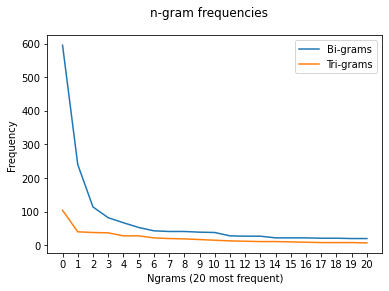

In [69]:
ngrams_bi = dict(Counter(token_bi))
ngrams_tri = dict(Counter(token_tri))
ngrams_sorted_bi = sorted(ngrams_bi.items(), key=lambda x: x[1], reverse=True)
ngrams_sorted_tri = sorted(ngrams_tri.items(), key=lambda x: x[1], reverse=True)

frequencies_bi = []
frequencies_tri = []
for i in range(len(ngrams_sorted_bi)):
    frequencies_bi.append(ngrams_sorted_bi[i][1])
for i in range(len(ngrams_sorted_tri)):
    frequencies_tri.append(ngrams_sorted_tri[i][1])

x = range(11251)
y = range(14264)
plt.plot(frequencies_bi[0:21])
plt.plot(frequencies_tri[0:21])
plt.legend(["Bi-grams", "Tri-grams"])
plt.suptitle('n-gram frequencies')
plt.ylabel("Frequency")
plt.xlabel("Ngrams (20 most frequent)")
plt.xticks(range(0, 21))
plt.savefig(f"{cwd}/plots/1.3_ngram_distr.png")
plt.show()

<b>TASK 4</b>

In [71]:
from lemminflect import getInflection, getAllInflections, getAllInflectionsOOV
import random

random_sentence = random.randint(0, len(list(train_data_doc.sents)) -1)


# DONT RUN WE FOUND A NICE ONE:

# # This gets us a random sentence
# i = 0
# for sentences in train_data_doc.sents:
#     if i == random_sentence:
#         sentence = sentences
#     i += 1

# for token in sentence:
#     if 2 < len(getAllInflections(token.text)) < 4:
#         inflections = getAllInflections(token.text)
#         inflection_list = []
#         for i in range(len(all_inflections)):
#             inflection_list.append(str(all_inflections[i][0]))
#         inflection_set = set(inflection_list)
#         if len(inflection_set) == 3:
#             word_token = token
#             break
#         else:
#             continue

for sentences in train_data_doc.sents:
    sentence = sentences
    for token in sentence:
        if token.text == "say":
            word_token = token
            inflections = getAllInflections(token.text)
            break


print(f"Word: {word_token.text}\nLemma: {word_token.lemma_}\nInflected forms: {inflections}")


all_inflections =  list(inflections.values())

doc_length = 0
for i in train_data_doc.sents:
    doc_length += 1


def check_sentences(inflection):
    for sentences in train_data_doc.sents:
        sentence = str(sentences)
        if str(inflection) in sentence:
            print(f"({inflection}): {sentence}")
            break

inflection_list = []
for i in range(len(all_inflections)):
    inflection_list.append(str(all_inflections[i][0]))
    
inflection_set = set(inflection_list)
for inflection in inflection_set:
    check_sentences(inflection)
    
        
            
            
        

Word: say
Lemma: say
Inflected forms: {'NNS': ('say',), 'NN': ('say',), 'VBD': ('said',), 'VBN': ('said',), 'VBG': ('saying',), 'VBZ': ('says',), 'VB': ('say',), 'VBP': ('say',)}
(says): 
It says they repeated their confessions at various times , including in court with legal representation , before retracting them .
(said): 
Police said three children were hospitalised for \" severe dehydration \" .
(say): 
Russian Presidential spokesperson Dmitry Peskov echoed Putin , saying the troops are \" a threat .
(saying): 
Russian Presidential spokesperson Dmitry Peskov echoed Putin , saying the troops are \" a threat .


<b>TASK 5</b>

In [30]:
print(len(train_data_doc.ents))
print(len(Counter([ent.label_ for ent in train_data_doc.ents]).keys()))
print(Counter([ent.label_ for ent in train_data_doc.ents]).keys())
stop_counter = 0
for sentence in train_data_doc.sents:
   stop_counter += 1
   displacy.render(sentence, jupyter=True, style='ent')
   if stop_counter == 5: break

1627
17
dict_keys(['DATE', 'GPE', 'ORDINAL', 'CARDINAL', 'ORG', 'PERSON', 'LAW', 'QUANTITY', 'NORP', 'TIME', 'EVENT', 'LOC', 'PERCENT', 'MONEY', 'PRODUCT', 'FAC', 'WORK_OF_ART'])


/home/damion/anaconda3/envs/NLPT/lib/python3.8/site-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<h1><b>PART B</b></h1>

In [13]:
#wiki_news_train = open('C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/data/original/english/WikiNews_Train.tsv', encoding='utf-8')
wiki_news_train_df = pd.read_table(f'{cwd}/data/original/english/WikiNews_Train.tsv', header = None)
wiki_news_train_df.columns = ['ID', 'sentence', 'start_index', 'end_index', 'target_word', 'nat', 'non-nat', 'nat diff', 'non-nat diff', 'binary', 'prob']

<b>TASK 7</b>

In [74]:
target_word = list(wiki_news_train_df["target_word"])
binary_label = list(wiki_news_train_df["binary"])
prob_label = list(wiki_news_train_df["prob"])

token_list = []

for i in range(len(target_word)):
    instance = nlp(target_word[i])
    token_list.append(0)
    for token in instance:
        token_list[i] +=1


print(f"Number of instances labeled with 0: {Counter(binary_label)[1]}\n\
Number of instances labeled with 1: {Counter(binary_label)[0]}\n\
Probabilistic label:\n\
\tmin: {np.min(prob_label)}\n\
\tmax: {np.max(prob_label)}\n\
\tmedian: {np.median(prob_label)}\n\
\tmean: {round(np.mean(prob_label), 3)}\n\
\tstd: {round(np.std(prob_label), 3)}\n\
Number of instances consisting of more than one token: {sum(i > 1 for i in token_list)}\n\
Maximum number of tokens for an instance: : {max(token_list)}")

Number of instances labeled with 0: 3216
Number of instances labeled with 1: 4530
Probabilistic label:
	min: 0.0
	max: 1.0
	median: 0.0
	mean: 0.084
	std: 0.17
Number of instances consisting of more than one token: 1086
Maximum number of tokens for an instance: : 10


<b>TASK 8</b>

In [34]:
length_tokens = []
frequency = []
prob = []
pos = []

from wordfreq import zipf_frequency

#filter only instances with one token and which are labeled as complex from at leat one annotator
for index, row in wiki_news_train_df.iterrows():
    instance = nlp(row['target_word'])
    tokens_per_instance = [token for token in instance]
    if (len(tokens_per_instance) == 1) and (row['binary'] == 1):
        length_tokens.append(len(tokens_per_instance[0].text))   
        frequency.append(zipf_frequency(tokens_per_instance[0].text, 'en'))
        prob.append(row['prob'])
        pos.append(tokens_per_instance[0].pos_)


In [54]:
from scipy.stats import pearsonr

print("Pearson correlation length and complexity: {}".format(pearsonr(length_tokens, prob)))
print("Pearson correlation frequency and complexity: {}".format(pearsonr(frequency, prob)))

Pearson correlation length and complexity: (0.3020751387042099, 4.103410007102572e-52)
Pearson correlation frequency and complexity: (-0.26876915450151273, 3.2226022021238034e-41)


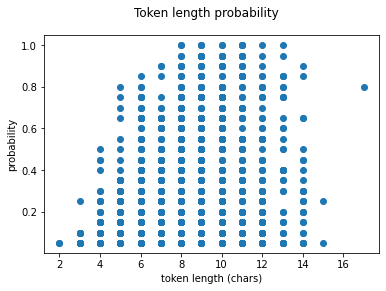

In [60]:
plt.scatter(length_tokens, prob)
plt.suptitle("Token length probability")
plt.ylabel("probability")
plt.xlabel("token length (chars)")
plt.savefig(f"{cwd}/plots/A_8_1_length.png")
plt.show()

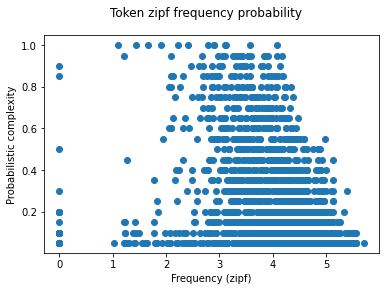

In [61]:
plt.scatter(frequency, prob)
plt.suptitle("Token zipf frequency probability")
plt.xlabel("Frequency (zipf)")
plt.ylabel("Probabilistic complexity")
plt.savefig(f"{cwd}/plots/A_8_2_frequency.png")
plt.show()

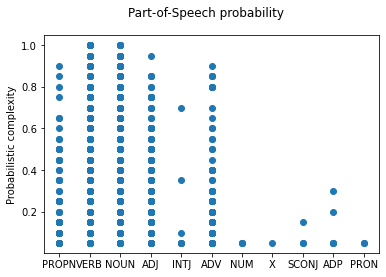

In [64]:
plt.scatter(pos, prob)
plt.suptitle("Part-of-Speech probability")
plt.ylabel("Probabilistic complexity")
plt.savefig(f"{cwd}/plots/A_8_2_frequency.png")
plt.show()

<b>TASK 10</b>

In [81]:
# Implement four baselines for the task.
# Majority baseline: always assigns the majority class of the training data
# Random baseline: randomly assigns one of the classes. Make sure to set a random seed and average the accuracy over 100 runs.
# Length baseline: determines the class based on a length threshold
# Frequency baseline: determines the class based on a frequency threshold

from model.data_loader import DataLoader

# Each baseline returns predictions for the test data. The length and frequency baselines determine a threshold using the development data.

def majority_baseline(train_sentences, train_labels, testinput, testlabels):
    #find out about majority  class in training data
    predictions = []
    for instance in train_labels:   
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            predictions.append(i)
            
    majority_class = Counter(predictions).most_common()[0][0]
    #assign to each token (word) in test data the majority class as predicted value
    predictions = []
    for instance in testinput:
        tokens = instance.split(" ")
        for _ in tokens:
            predictions.append(majority_class)
    
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions




def random_baseline(train_sentences, train_labels, testinput, testlabels):
    predictions = []
    labels = []
    for i in range(len(train_labels)):
        sentence = train_labels[i].split(" ")
        for token in sentence:
            labels.append(token)
    baseline_set = list(set(labels))

    predictions = []
    for instance in testinput:
        tokens = instance.split(" ")
        for token in tokens:
            random_baseline = baseline_set[random.randint(1, len(baseline_set) -1)]
            predictions.append(random_baseline)

    test_labels = []
    for i in range(len(testlabels)):
        sentence = testlabels[i].split(" ")
        for token in sentence:
            if token == 'N\n':
                token = 'N'
            elif token == 'C\n':
                token = 'C'
            test_labels.append(token)

    acc_counter = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            acc_counter += 1

    accuracy = round(acc_counter / len(predictions), 2)

    return  accuracy, predictions  



def length_baseline(testinput, testlabels, length_threshold):  
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)
    
    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if len(token) >= length_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  



def frequency_baseline(testinput, testlabels, frequency_threshold):
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if zipf_frequency(token, 'en') <= frequency_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  

if __name__ == '__main__':
    dir_path = cwd
    train_path = dir_path + "/data/preprocessed/train/"
    dev_path = dir_path + "/data/preprocessed/val/"          #changed from "/dev/" to "/val/" because there exists no "dev" folder
    test_path = dir_path + "/data/preprocessed/test/"

    # Note: this loads all instances into memory. If you work with bigger files in the future, use an iterator instead.

    with open(train_path + "sentences.txt") as sent_file:
        train_sentences = sent_file.readlines()

    with open(train_path + "labels.txt") as label_file:
        train_labels = label_file.readlines()

    with open(dev_path + "sentences.txt") as dev_file:
        dev_sentences = dev_file.readlines()

    with open(dev_path + "labels.txt") as dev_label_file:       #changed from "train_path" to "dev_path"
        dev_labels = dev_label_file.readlines()

    with open(test_path + "sentences.txt") as testfile:
        testinput = testfile.readlines()

    with open(test_path + "labels.txt") as test_label_file:
        testlabels = test_label_file.readlines()
        
    length_threshold = 8   #accuracy best at threshold 8         
    frequency_threshold = 4.52  #accuracy best at zipf-frequency-threshold 4.52
    dev_majority_accuracy, dev_majority_predictions = majority_baseline(train_sentences, train_labels, dev_sentences, dev_labels)
    dev_random_accuracy, dev_random_predictions = random_baseline(train_sentences, train_labels, dev_sentences, dev_labels)
    dev_length_accuracy, dev_length_predictions = length_baseline(dev_sentences, dev_labels, length_threshold)
    dev_frequency_accuracy, dev_frequency_predictions = frequency_baseline(dev_sentences, dev_labels, frequency_threshold)

    test_majority_accuracy, test_majority_predictions = majority_baseline(train_sentences, train_labels, testinput, testlabels)
    test_random_accuracy, test_random_predictions = random_baseline(train_sentences, train_labels, testinput, testlabels)
    test_length_accuracy, test_length_predictions = length_baseline(testinput, testlabels, length_threshold)
    test_frequency_accuracy, test_frequency_predictions = frequency_baseline(testinput, testlabels, frequency_threshold)
 

    baselines = ["Majority", "Random", "Length", "Frequency"]
    acc_dev = [dev_majority_accuracy, dev_random_accuracy, dev_length_accuracy, dev_frequency_accuracy]
    acc_test = [test_majority_accuracy, test_random_accuracy, test_length_accuracy, test_frequency_accuracy]
    baseline_df = pd.DataFrame({"Baseline":baselines, "Accuracy on dev": acc_dev, "Accuracy on test":acc_test})



In [82]:
baseline_df.head()

,Baseline,Accuracy on dev,Accuracy on test
0,Majority,0.85,0.80
1,Random,0.52,0.49
2,Length,0.88,0.87
3,Frequency,0.75,0.76
